In [ ]:
import pandas as pd
import numpy as np

In [ ]:
mpg = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mpg.csv')

#0.데이터 확인

In [ ]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


#1. 2000년 이전 제작된 차량의 수는?

In [ ]:
mpg['year'].value_counts()

1999    117
2008    117
Name: year, dtype: int64

117개

#2. 2000년을 기준으로 구형, 신형 자동차로 구분했을 때, 구형이 가장 많은 제조사는?

In [ ]:
mpg['yeartype'] = np.where(mpg['year']<2000, 'old','new')
mpg[['manufacturer','yeartype']].head()

,manufacturer,yeartype
0,audi,old
1,audi,old
2,audi,new
3,audi,new
4,audi,old


In [ ]:
my_mpg = mpg[['manufacturer','yeartype']] 
my_mpg['man_old_counts'] = np.where(my_mpg['yeartype'] == 'old',my_mpg['manufacturer'], None )
my_mpg.head()

<ipython-input-94-3f77160b95d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_mpg['man_old_counts'] = np.where(my_mpg['yeartype'] == 'old',my_mpg['manufacturer'], None )


,manufacturer,yeartype,man_old_counts
0,audi,old,audi
1,audi,old,audi
2,audi,new,None
3,audi,new,None
4,audi,old,audi


In [ ]:
my_mpg['man_old_counts'].value_counts()

toyota        20
dodge         16
volkswagen    16
ford          15
audi           9
chevrolet      7
hyundai        6
nissan         6
subaru         6
honda          5
pontiac        3
jeep           2
land rover     2
lincoln        2
mercury        2
Name: man_old_counts, dtype: int64

토요타가 20개로 가장 구형이 많음

##3.구형 비율이 가장 높은 제조사는?

In [ ]:
my_mpg['man_old_counts'].value_counts()/my_mpg['manufacturer'].value_counts()

audi          0.500000
chevrolet     0.368421
dodge         0.432432
ford          0.600000
honda         0.555556
hyundai       0.428571
jeep          0.250000
land rover    0.500000
lincoln       0.666667
mercury       0.500000
nissan        0.461538
pontiac       0.600000
subaru        0.428571
toyota        0.588235
volkswagen    0.592593
dtype: float64

lincoln 이 67%로 가장 많음

##4.구형, 신형의 연비 평균

In [ ]:
old_cty = np.where(mpg['yeartype']== 'old',mpg['cty'],0).sum()/117
new_cty = np.where(mpg['yeartype']== 'new',mpg['cty'],0).sum()/117
pd.DataFrame({'구형':[old_cty],'신형':[new_cty]})

,구형,신형
0,17.017094,16.700855


##5.구형, 신형의 연비 히스토그램

- 구형

<AxesSubplot:>

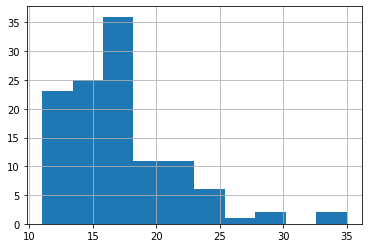

In [ ]:
old_code = np.where(mpg['yeartype'] == 'old')
mpg.loc[old_code, 'cty'].hist()

- 신형

<AxesSubplot:>

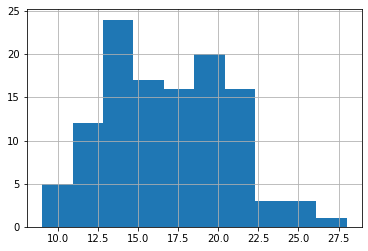

In [ ]:
new_code = np.where(mpg['yeartype'] == 'new')
mpg.loc[new_code, 'cty'].hist()